## Explication : algorithme de Grover

Il s'agit d'implémenter l'algorithme de Grover vu en cours qui permet la recherche d'un index dans une base de donnée. Cette dernière est encodée comme une liste d'états de la base de calcul quantique.

A noter : l'impémentation réalisée dans le cadre du tp est notament inspirée de la classe GroverOperator et de la documentation de qisikit.

Nous aurons besoin d'un opérateur $U_\omega|x\rangle$ qui inverse la phase des solutions et dont on peut trouver simplement la matrice associée.

Après création d'un état de superposition quantique $|+\rangle^{\otimes n}$, on applique l'opérateur de diffusion qui augmente la probabilité de mesurer l'état avec une phase de signe opposé aux autres. On suppose ici qu'il n'y a qu'une solution notée $s$ et correspondant au dernier élément de la liste soit $|11\rangle$. 

Le nombre de fois où l'on applique ces opérations doit être maîtrisé comme vu en cours.


## Implémentation

In [1]:
!pip install qiskit
#!pip install git+https://github.com/qiskit-community/qiskit-textbook.git#subdirectory=qiskit-textbook-src
#!pip install pylatexenc


     |████████████████████████████████| 6.4 MB 8.9 MB/s 
     |████████████████████████████████| 18.0 MB 315 kB/s 
     |████████████████████████████████| 238 kB 42.5 MB/s 
     |████████████████████████████████| 200 kB 72.7 MB/s 
     |████████████████████████████████| 53 kB 2.0 MB/s 
     |████████████████████████████████| 1.4 MB 57.0 MB/s 
     |████████████████████████████████| 943 kB 52.1 MB/s 
     |████████████████████████████████| 38.2 MB 1.3 MB/s 
     |████████████████████████████████| 49 kB 4.7 MB/s 
     |████████████████████████████████| 49 kB 5.3 MB/s 
     |████████████████████████████████| 38.1 MB 1.6 MB/s 
     |████████████████████████████████| 3.6 MB 61.2 MB/s 
     |████████████████████████████████| 112 kB 79.4 MB/s 
  Created wheel for qiskit: filename=qiskit-0.34.1-py3-none-any.whl size=11771 sha256=6ba9b8a659ca1aaa85dde51b33e0bc455ad5a5ddb82392d03b9aac98b244d35b
  Stored in directory: /root/.cache/pip/wheels/79/b1/3f/8cdfd5543a84705e4bd16e081f2362b9b3bfd9898d2e2d

In [10]:
import numpy as np
from qiskit import IBMQ, Aer, assemble, transpile
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, assemble, transpile
from qiskit.providers.ibmq import least_busy
import matplotlib.pyplot as plt
from qiskit.visualization import plot_histogram

In [11]:
# Création de l'état de superposition quantique
def init(qc, qubits) :
    for q in qubits :
        qc.h(q)
    return qc
# L'oracle. La solution étant 11, la porte correspondante est un controle Z.
qc = QuantumCircuit(2)
qc.cz(0, 1)
oracle = qc.to_gate()
oracle.name = "U"

#Opérateur de diffusion
def diffuser(nqubits) :  
    qc = QuantumCircuit(nqubits)
    
    for qubit in range(nqubits) :
        qc.h(qubit)

    for qubit in range(nqubits) :
        qc.x(qubit)
        
    qc.h(nqubits - 1)
    qc.mct(list(range(nqubits - 1)), nqubits - 1)
    qc.h(nqubits - 1)
    
    for qubit in range(nqubits) :
        qc.x(qubit)
        
    for qubit in range(nqubits) :
        qc.h(qubit)
        
    U_s = qc.to_gate()
    U_s.name = "U_bis$"
    return U_s

In [12]:
n = 2
qc = QuantumCircuit(n)
qc = init(qc, [0,1])
qc.append(oracle, [0, 1])
qc.append(diffuser(n), [0, 1])

qc.measure_all()
qc.draw() #mpl ne marche pas sur mon collab

┌───┐┌────┐┌─────────┐ ░ ┌─┐   
   q_0: ┤ H ├┤0   ├┤0        ├─░─┤M├───
        ├───┤│  U ││  U_bis$ │ ░ └╥┘┌─┐
   q_1: ┤ H ├┤1   ├┤1        ├─░──╫─┤M├
        └───┘└────┘└─────────┘ ░  ║ └╥┘
meas: 2/══════════════════════════╩══╩═
                                  0  1

## Simulation :

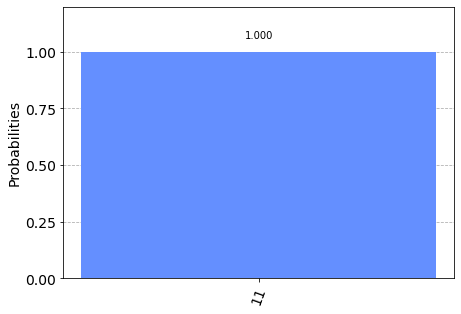

In [9]:
aer_sim = Aer.get_backend('aer_simulator')
transpiled_circuit = transpile(qc, aer_sim)
results = aer_sim.run(transpiled_circuit).result()
counts = results.get_counts()
plot_histogram(counts)


Il suffit de trouver les bons oracles pour étendre l'algorithme à une solution quelconque. Le code présenté ici permet déjà de gérer le nombre de qubits quelconque.

Pour le nombre d'opérations à effectuer on utilise la formule du cours : 



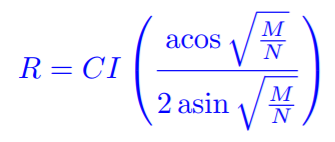